In [38]:
import pandas as pd
df = pd.read_csv('weather_data.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())

         date  avg_temperature   humidity  avg_wind_speed rain_or_not  \
0  2023-01-01        23.745401  46.140905        7.845981        Rain   
1  2023-01-02        30.030503  59.876587        5.382457        Rain   
2  2023-01-03        28.365224  51.464618       13.158008        Rain   
3  2023-01-04        27.550929  53.103799        5.886677        Rain   
4  2023-01-05        23.639303  57.826186       12.248992        Rain   

   cloud_cover     pressure  
0    20.851051   992.965681  
1    93.059521  1037.273025  
2    11.636640  1034.193357  
3    81.744971   968.610142  
4    38.062329  1030.264331  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             311 non-null    object 
 1   avg_temperature  296 non-null    float64
 2   humidity         296 non-null    float64
 3   avg_wind_speed   296 non-null    float64
 

In [40]:
import pandas as pd
import numpy as np
df = pd.read_csv('weather_data.csv')
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
num_features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover']
for col in num_features:
    df[col].fillna(df[col].mean(), inplace=True)
df['rain_or_not'] = df['rain_or_not'].apply(lambda x: 1 if x.strip().lower() == 'rain' else 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             311 non-null    datetime64[ns]
 1   avg_temperature  311 non-null    float64       
 2   humidity         311 non-null    float64       
 3   avg_wind_speed   311 non-null    float64       
 4   rain_or_not      311 non-null    int64         
 5   cloud_cover      311 non-null    float64       
 6   pressure         311 non-null    float64       
 7   month            311 non-null    int32         
 8   day              311 non-null    int32         
 9   weekday          311 non-null    int32         
dtypes: datetime64[ns](1), float64(5), int32(3), int64(1)
memory usage: 20.8 KB


C:\Users\USER\AppData\Local\Temp\ipykernel_14180\928863582.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


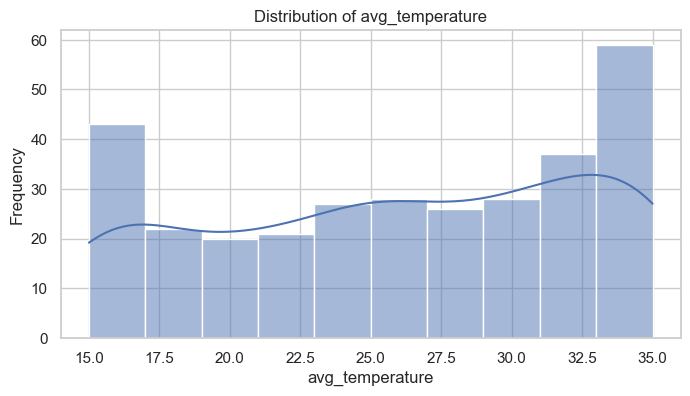

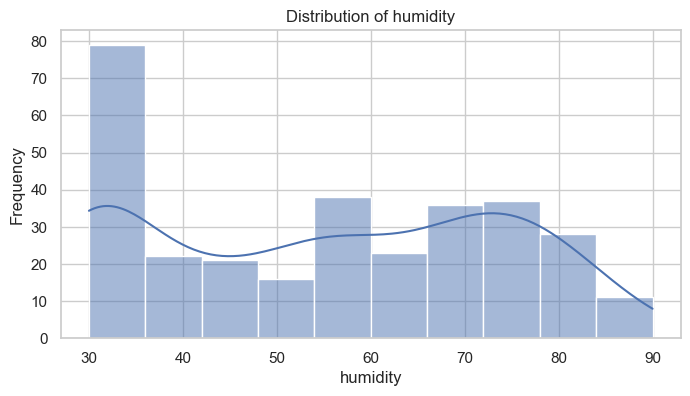

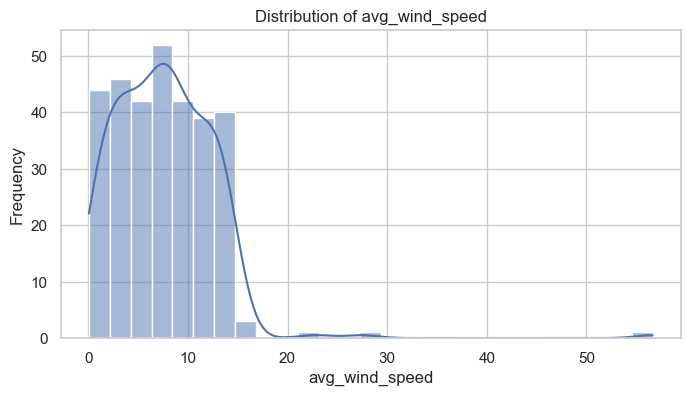

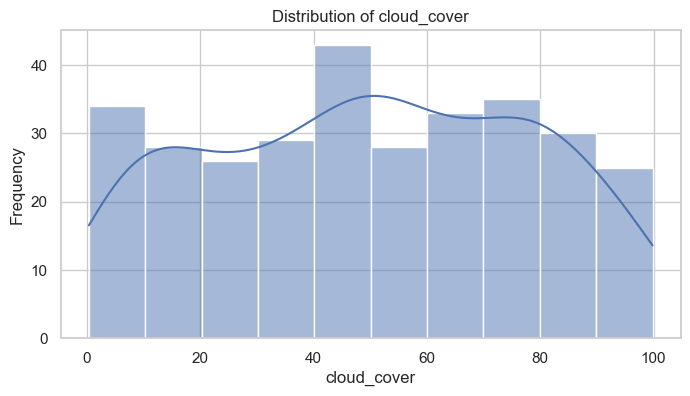

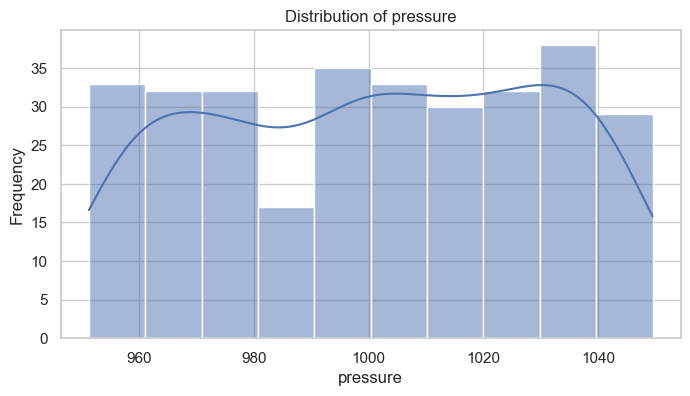

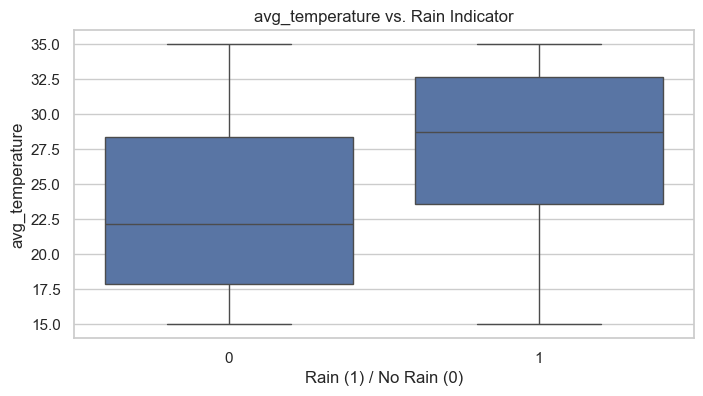

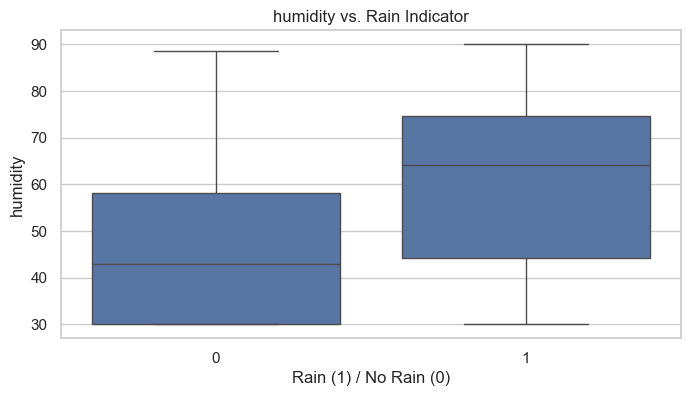

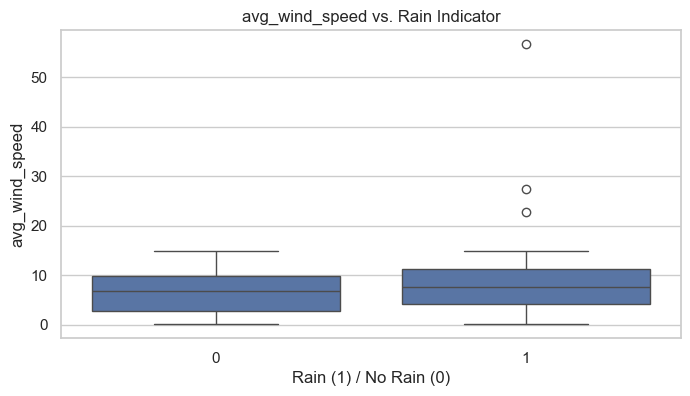

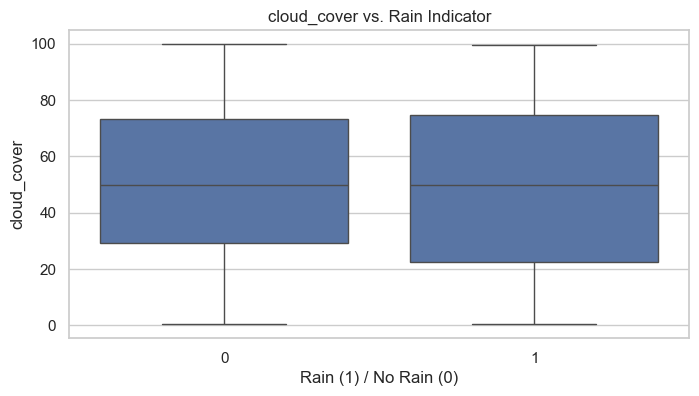

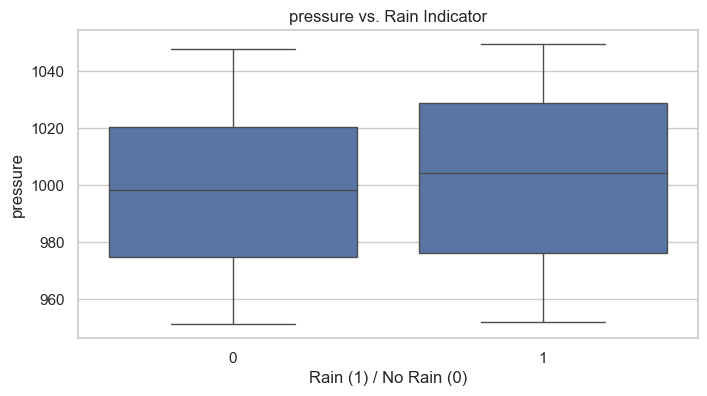

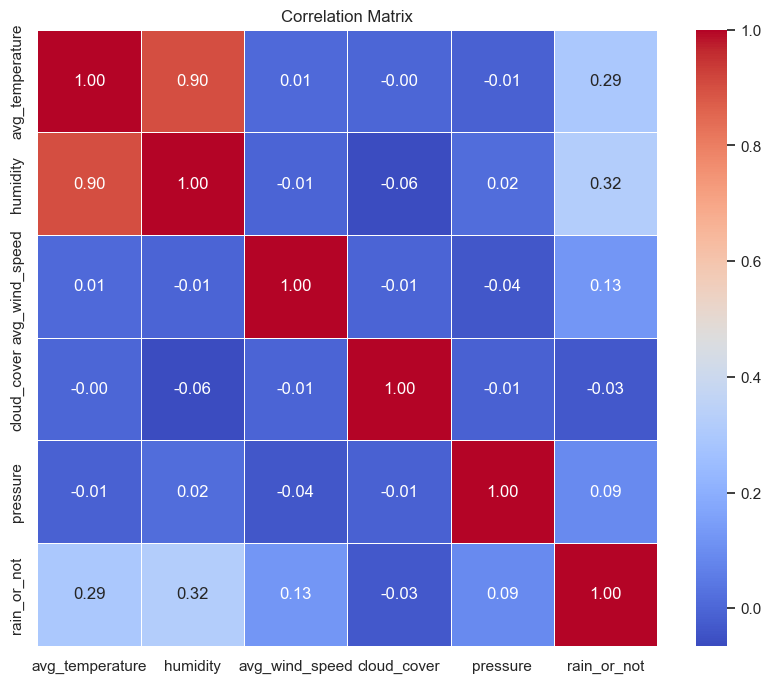

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

numerical_features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='rain_or_not', y=feature, data=df)
    plt.title(f'{feature} vs. Rain Indicator')
    plt.xlabel('Rain (1) / No Rain (0)')
    plt.ylabel(feature)
    plt.show()
if df['rain_or_not'].dtype != 'int64' and df['rain_or_not'].dtype != 'float64':
    df['rain_or_not'] = df['rain_or_not'].apply(lambda x: 1 if x.strip().lower() == 'rain' else 0)

corr_features = numerical_features + ['rain_or_not']
corr_matrix = df[corr_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure', 'month', 'day', 'weekday']
X = df[features]
y = df['rain_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability of rain

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        22
           1       0.73      0.80      0.77        41

    accuracy                           0.68        63
   macro avg       0.64      0.63      0.63        63
weighted avg       0.67      0.68      0.67        63

ROC-AUC Score: 0.6008869179600888


In [46]:
from sklearn.linear_model import LogisticRegression

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']  # Different solvers can affect convergence and performance
}

# Instantiate Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Set up GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Retrieve the best model and evaluate it
best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]

print("Logistic Regression Best Hyperparameters:", grid_search_lr.best_params_)
print("Logistic Regression ROC AUC Score:", roc_auc_score(y_test, y_prob_lr))


Logistic Regression Best Hyperparameters: {'C': 0.01, 'solver': 'lbfgs'}
Logistic Regression ROC AUC Score: 0.5997782705099779


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure', 'month', 'day', 'weekday']
X = df[features]
y = df['rain_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

lr_model = LogisticRegression(max_iter=1000, random_state=42)
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

best_lr = grid_search_lr.best_estimator_
print("Best Hyperparameters:", grid_search_lr.best_params_)

y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

roc_auc = roc_auc_score(y_test, y_prob_lr)
print("Final Logistic Regression ROC AUC Score:", roc_auc)


Best Hyperparameters: {'C': 0.01, 'solver': 'lbfgs'}

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        22
           1       0.73      0.80      0.77        41

    accuracy                           0.68        63
   macro avg       0.64      0.63      0.63        63
weighted avg       0.67      0.68      0.67        63

Final Logistic Regression ROC AUC Score: 0.5997782705099779


In [52]:
import numpy as np
import pandas as pd

future_dates = pd.date_range(start=df['date'].max() + pd.Timedelta(days=1), periods=21)
future_df = pd.DataFrame({
    'date': future_dates,
    'avg_temperature': np.random.uniform(df['avg_temperature'].min(), df['avg_temperature'].max(), 21),
    'humidity': np.random.uniform(df['humidity'].min(), df['humidity'].max(), 21),
    'avg_wind_speed': np.random.uniform(df['avg_wind_speed'].min(), df['avg_wind_speed'].max(), 21),
    'cloud_cover': np.random.uniform(df['cloud_cover'].min(), df['cloud_cover'].max(), 21),
    'pressure': np.random.uniform(df['pressure'].min(), df['pressure'].max(), 21)
})

future_df['date'] = pd.to_datetime(future_df['date'])
future_df['month'] = future_df['date'].dt.month
future_df['day'] = future_df['date'].dt.day
future_df['weekday'] = future_df['date'].dt.weekday

X_future = future_df[features]

future_df['rain_probability'] = best_lr.predict_proba(X_future)[:, 1]

print("\nFuture Predictions (Next 21 Days):")
print(future_df[['date', 'rain_probability']])



Future Predictions (Next 21 Days):
         date  rain_probability
0  2023-11-08          0.920748
1  2023-11-09          0.731282
2  2023-11-10          0.666825
3  2023-11-11          0.925615
4  2023-11-12          0.464814
5  2023-11-13          0.701570
6  2023-11-14          0.648982
7  2023-11-15          0.962750
8  2023-11-16          0.875300
9  2023-11-17          0.801570
10 2023-11-18          0.904789
11 2023-11-19          0.939995
12 2023-11-20          0.874341
13 2023-11-21          0.565970
14 2023-11-22          0.512944
15 2023-11-23          0.684253
16 2023-11-24          0.899082
17 2023-11-25          0.673355
18 2023-11-26          0.789123
19 2023-11-27          0.771441
20 2023-11-28          0.717043


In [54]:
from tabulate import tabulate

output_df = future_df[['date', 'rain_probability']].copy()
output_df['rain_probability'] = output_df['rain_probability'].round(6)

print("Future Predictions (Next 21 Days):")
print(tabulate(output_df, headers='keys', tablefmt='psql', showindex=False))


Future Predictions (Next 21 Days):
+---------------------+--------------------+
| date                |   rain_probability |
|---------------------+--------------------|
| 2023-11-08 00:00:00 |           0.920748 |
| 2023-11-09 00:00:00 |           0.731282 |
| 2023-11-10 00:00:00 |           0.666825 |
| 2023-11-11 00:00:00 |           0.925615 |
| 2023-11-12 00:00:00 |           0.464814 |
| 2023-11-13 00:00:00 |           0.70157  |
| 2023-11-14 00:00:00 |           0.648982 |
| 2023-11-15 00:00:00 |           0.96275  |
| 2023-11-16 00:00:00 |           0.8753   |
| 2023-11-17 00:00:00 |           0.80157  |
| 2023-11-18 00:00:00 |           0.904789 |
| 2023-11-19 00:00:00 |           0.939995 |
| 2023-11-20 00:00:00 |           0.874341 |
| 2023-11-21 00:00:00 |           0.56597  |
| 2023-11-22 00:00:00 |           0.512944 |
| 2023-11-23 00:00:00 |           0.684253 |
| 2023-11-24 00:00:00 |           0.899082 |
| 2023-11-25 00:00:00 |           0.673355 |
| 2023-11-26 00:00:0